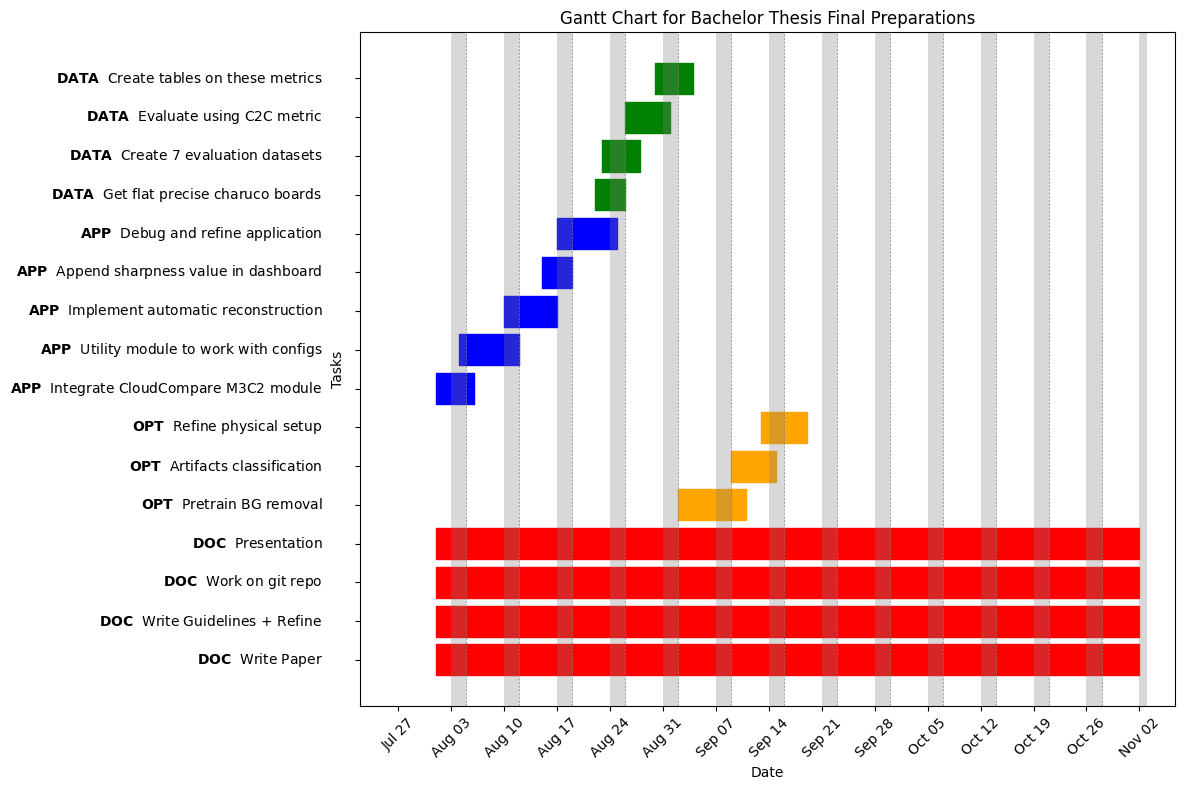

: 

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
from matplotlib import dates


# Define the tasks
tasks = [
    {"Task": "DOC: Write Paper", "Start": "2024-08-01", "End": "2024-10-31", "color" : "red"},
    {"Task": "DOC: Write Guidelines + Refine", "Start": "2024-08-01", "End": "2024-10-31", "color" : "red"},
    {"Task": "DOC: Work on git repo", "Start": "2024-08-01", "End": "2024-10-31", "color" : "red"},
    {"Task": "DOC: Presentation", "Start": "2024-08-01", "End": "2024-10-31", "color" : "red"},
    {"Task": "OPT: Pretrain BG removal", "Start": "2024-09-02", "End": "2024-09-09", "color" : "orange"},
    {"Task": "OPT: Artifacts classification", "Start": "2024-09-09", "End": "2024-09-13", "color" : "orange"},
    {"Task": "OPT: Refine physical setup", "Start": "2024-09-13", "End": "2024-09-17", "color" : "orange"},
    {"Task": "APP: Integrate CloudCompare M3C2 module", "Start": "2024-08-01", "End": "2024-08-04", "color" : "blue"},
    {"Task": "APP: Utility module to work with configs", "Start": "2024-08-04", "End": "2024-08-10", "color" : "blue"},
    {"Task": "APP: Implement automatic reconstruction", "Start": "2024-08-10", "End": "2024-08-15", "color" : "blue"},
    {"Task": "APP: Append sharpness value in dashboard", "Start": "2024-08-15", "End": "2024-08-17", "color" : "blue"},
    {"Task": "APP: Debug and refine application", "Start": "2024-08-17", "End": "2024-08-23", "color" : "blue"},
    {"Task": "DATA: Get flat precise charuco boards", "Start": "2024-08-22", "End": "2024-08-24", "color" : "green"},
    {"Task": "DATA: Create 7 evaluation datasets", "Start": "2024-08-23", "End": "2024-08-26", "color" : "green"},
    {"Task": "DATA: Evaluate using C2C metric", "Start": "2024-08-26", "End": "2024-08-30", "color" : "green"},
    {"Task": "DATA: Create tables on these metrics", "Start": "2024-08-30", "End": "2024-09-02", "color" : "green"},
    
]

# Create a dataframe
df = pd.DataFrame(tasks)

# Convert Start and End dates to datetime
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])+pd.Timedelta(days=2)

# Sort tasks by their name
df.sort_values('Task', inplace=True)

# Calculate the duration
df['Duration'] = df['End'] - df['Start']

# Plotting the Gantt chart
fig, ax = plt.subplots(figsize=(12, 8))

for idx, task in df.iterrows():
    ax.broken_barh([(task['Start'], task['Duration'])], (idx - 0.4, 0.8), facecolors='tab:blue',color = task['color'])

# Set labels for the y-axis
ax.set_yticks(range(len(df)))
ax.set_yticklabels(['']*len(df))  # Clear the y-tick labels

# Adding text annotations outside the plot with bold substrings
for idx, task in df.iterrows():
    task_name = task['Task']
    parts = task_name.split(':')
    # Make the first part bold
    first_part = parts[0]
    rest_parts = ' '.join(parts[1:])
    ax.text(df['Start'].min() - pd.Timedelta(days=15), idx, f"$\\bf{{{first_part}}}$ {rest_parts}", ha='right', va='center')

# Adjust the limits to make space for the task names
plt.xlim(left=df['Start'].min() - pd.Timedelta(days=10))

# Adding dotted vertical lines after each week
start_date = df['Start'].min()
end_date = df['End'].max()
current_date = start_date

while current_date <= end_date:
    if current_date.weekday() == 0:
        ax.axvline(current_date, color='gray', linestyle='--', linewidth=0.5)
    current_date += pd.Timedelta(days=1)

# Highlight weekends
current_date = start_date
while current_date <= end_date:
    if current_date.weekday() >= 5:  # Saturday or Sunday
        ax.axvspan(current_date, current_date + pd.Timedelta(days=1), facecolor='gray', alpha=0.3)
    current_date += pd.Timedelta(days=1)

# Format the x-axis to show dates
#ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.xaxis.set_major_locator(dates.DayLocator(interval=7))
# Rotate date labels for better readability
plt.xticks(rotation=45)

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Tasks')
plt.title('Gantt Chart for Bachelor Thesis Final Preparations')

plt.tight_layout()
plt.savefig("../data/figures/gant_plot.png")

<Figure size 640x480 with 0 Axes>